In [1]:
import librosa

## Sampling
Sound is a continuous wave. We can digitise sound by breaking the continuous wave into discrete signals. This process is called sampling. Sampling converts a sound wave into a sequence of samples or a discrete-time signal.
The load functions loads the audio file and converts it into an array of values which represent the amplitude if a sample at a given point of time.

## Sampling Rate
The sampling rate is the number of samples per second. Hz or Hertz is the unit of the sampling rate. 20 kHz is the audible range for human beings.

In [2]:

x, sr = librosa.load('test-clean/LibriSpeech/test-clean/5683/32866/5683-32866-0021.flac')

/home/sd2001/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [3]:
import matplotlib.pyplot as plt
import librosa.display
print(x.shape)
print(sr)

(174195,)
22050


In [4]:
print("Sample Rate",sr)
print("Audio length(s)",len(x)/sr)

Sample Rate 22050
Audio length(s) 7.9


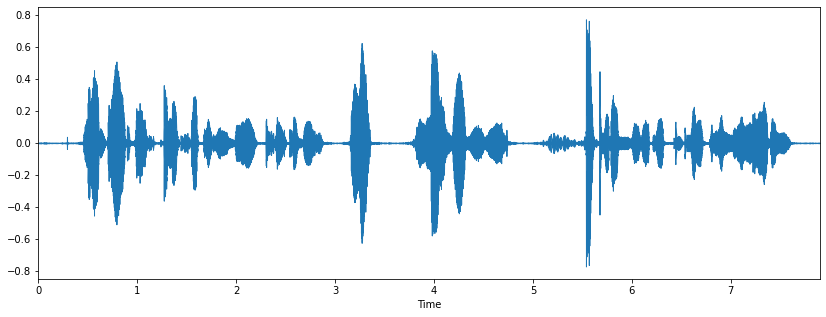

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

/home/sd2001/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


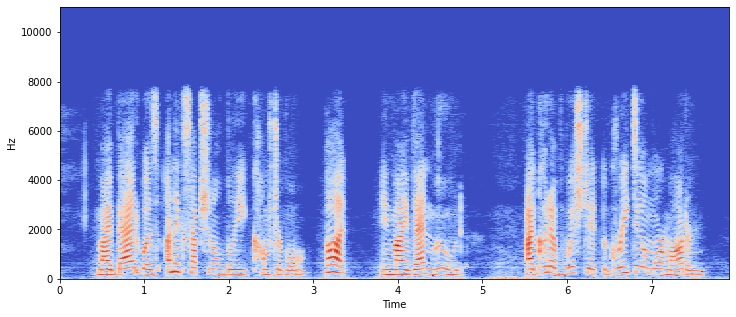

In [6]:
X = librosa.stft(x.astype('float'))
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.show()

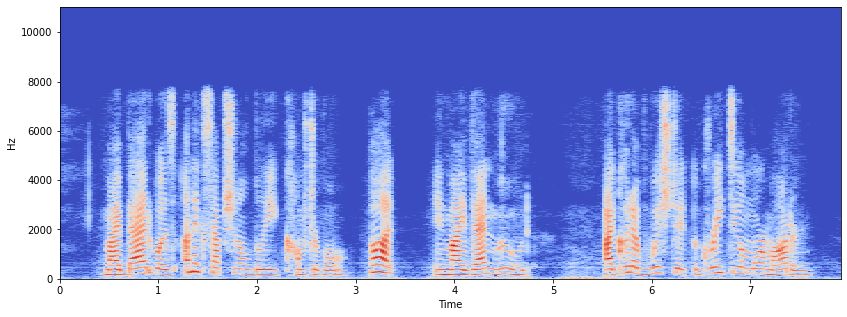

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [8]:
import IPython.display as ipd
ipd.Audio('test-clean/LibriSpeech/test-clean/5683/32866/5683-32866-0021.flac')

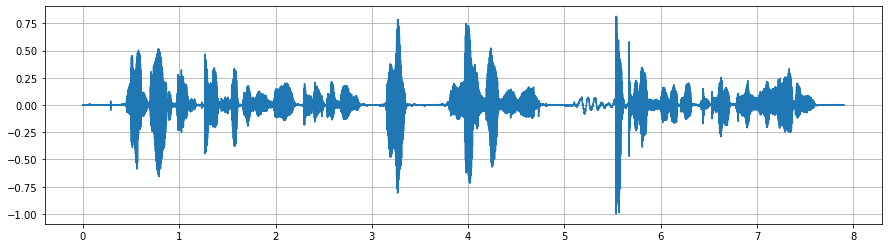

In [9]:
import numpy as np
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio
x = normalize_audio(x)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(x) /sr, num=len(x)), x)
plt.grid(True)

In [10]:
def frame_audio(audio, FFT_size=2048, hop_size=10, sample_rate=44100):    
    audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num,FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
    
    return frames
hop_size = 15 #ms
FFT_size = 2048

audio_framed = frame_audio(x, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sr)

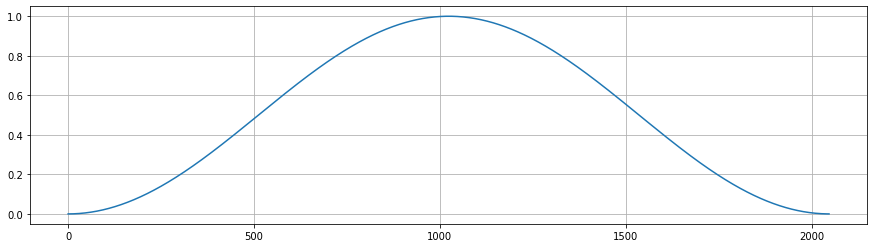

In [11]:
from scipy.signal import get_window
window = get_window("hann", FFT_size, fftbins=True)
plt.figure(figsize=(15,4))
plt.plot(window)
plt.grid(True)


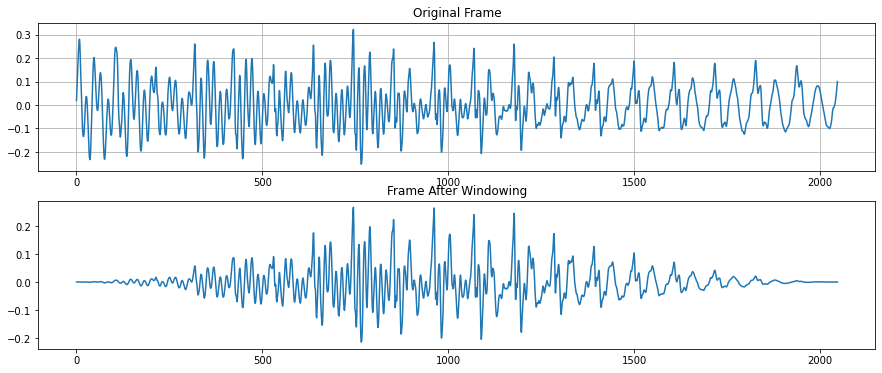

In [12]:
audio_win = audio_framed*window

ind = 69
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(audio_framed[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(audio_win[ind])
plt.title('Frame After Windowing')
plt.show()

In [13]:
import numpy as np
import soundfile as sf
import os
import keras
import sklearn
import librosa
from keras import backend as K

In [16]:
eps = np.finfo(np.float).eps
def count(audio, model, scaler):
    X = np.abs(librosa.stft(audio, n_fft=400, hop_length=160)).T
    X = scaler.transform(X)
    X = X[:500, :]
    Theta = np.linalg.norm(X, axis=1) + eps
    X /= np.mean(Theta)
    X = X[np.newaxis, ...]
    if len(model.input_shape) == 4:
        X = X[:, np.newaxis, ...]
        ys = model.predict(X, verbose=0)
    return np.argmax(ys, axis=1)[0]

In [21]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /home/sd2001/.local/lib/python3.8/site-packages (2.4.3)
Processing /home/sd2001/.cache/pip/wheels/13/90/db/290ab3a34f2ef0b5a0f89235dc2d40fea83e77de84ed2dc05c/PyYAML-5.3.1-cp38-cp38-linux_x86_64.whl


In [33]:
from tensorflow import keras
model = keras.models.load_model("F-CRNN.h5")

TypeError: ('Keyword argument not understood:', 'input_dtype')

In [26]:
!pip install keras==2.1.1

     |████████████████████████████████| 302 kB 178 kB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
